In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image

In [2]:
# Suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
# Importing the data

dfOriginal = pd.read_csv('Datasets/rvnS2F.csv')
df = dfOriginal.copy()
df

,Unnamed: 0,date,height_RVN,flow_RVN,stock_RVN,open_RVN,high_RVN,low_RVN,close_RVN,adj_close_RVN,volume_RVN,open_BTC,high_BTC,low_BTC,close_BTC,adj_close_BTC,volume_BTC
0,0,2018-01-03,5945000,5945000,5945000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1,2018-01-04,10945000,10945000,16890000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2,2018-01-05,11500000,11500000,28390000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,3,2018-01-06,9265000,9265000,37655000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,4,2018-01-07,13170000,13170000,50825000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,1240,2021-05-27,7330000,7330000,8845340000,0.10150,0.10380,0.09166,0.09448,0.09448,66895929.00000,39316.89062,40379.61719,37247.90234,38436.96875,38436.96875,43210968721.00000
1241,1241,2021-05-28,7020000,7020000,8852360000,0.09447,0.09601,0.07769,0.08129,0.08129,63652398.00000,38507.08203,38856.96875,34779.03906,35697.60547,35697.60547,55200191952.00000
1242,1242,2021-05-29,7130000,7130000,8859490000,0.08117,0.08446,0.07040,0.07615,0.07615,46482352.00000,35684.15625,37234.50000,33693.92969,34616.06641,34616.06641,45231013335.00000
1243,1243,2021-05-30,7250000,7250000,8866740000,0.07621,0.08379,0.07091,0.07864,0.07864,38637338.00000,34607.40625,36400.66797,33520.73828,35678.12891,35678.12891,31646080921.00000


# Data Transformation

In [4]:
# Missing values by columns/variables
df.isna().sum()

Unnamed: 0        0
date              0
height_RVN        0
flow_RVN          0
stock_RVN         0
open_RVN         73
high_RVN         73
low_RVN          73
close_RVN        73
adj_close_RVN    73
volume_RVN       73
open_BTC         70
high_BTC         70
low_BTC          70
close_BTC        70
adj_close_BTC    70
volume_BTC       70
dtype: int64

In [5]:
# We collect data since the creation of the RVN blockchain, before the sale of tokens. 
# These data will be excluded so as not to bias the model.

df = df.dropna()
df

,Unnamed: 0,date,height_RVN,flow_RVN,stock_RVN,open_RVN,high_RVN,low_RVN,close_RVN,adj_close_RVN,volume_RVN,open_BTC,high_BTC,low_BTC,close_BTC,adj_close_BTC,volume_BTC
66,66,2018-03-10,7145000,7145000,568000000,0.02650,0.02877,0.02606,0.02862,0.02862,171820.00000,9350.58984,9531.32031,8828.46973,8866.00000,8866.00000,5386319872.00000
67,67,2018-03-11,7380000,7380000,575380000,0.02852,0.03350,0.02624,0.03188,0.03188,279104.00000,8852.78027,9711.88965,8607.12012,9578.62988,9578.62988,6296370176.00000
68,68,2018-03-12,7345000,7345000,582725000,0.03150,0.03431,0.02859,0.03026,0.03026,218114.00000,9602.92969,9937.50000,8956.42969,9205.12012,9205.12012,6457399808.00000
69,69,2018-03-13,7675000,7675000,590400000,0.02990,0.03091,0.02571,0.02790,0.02790,167669.00000,9173.04004,9470.37988,8958.19043,9194.84961,9194.84961,5991139840.00000
70,70,2018-03-14,7455000,7455000,597855000,0.02772,0.02868,0.02375,0.02439,0.02439,131838.00000,9214.65039,9355.84961,8068.58984,8269.80957,8269.80957,6438230016.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,1240,2021-05-27,7330000,7330000,8845340000,0.10150,0.10380,0.09166,0.09448,0.09448,66895929.00000,39316.89062,40379.61719,37247.90234,38436.96875,38436.96875,43210968721.00000
1241,1241,2021-05-28,7020000,7020000,8852360000,0.09447,0.09601,0.07769,0.08129,0.08129,63652398.00000,38507.08203,38856.96875,34779.03906,35697.60547,35697.60547,55200191952.00000
1242,1242,2021-05-29,7130000,7130000,8859490000,0.08117,0.08446,0.07040,0.07615,0.07615,46482352.00000,35684.15625,37234.50000,33693.92969,34616.06641,34616.06641,45231013335.00000
1243,1243,2021-05-30,7250000,7250000,8866740000,0.07621,0.08379,0.07091,0.07864,0.07864,38637338.00000,34607.40625,36400.66797,33520.73828,35678.12891,35678.12891,31646080921.00000


In [6]:
# The hypothesis in this study is that scarcity, as measured by SF, directly drives value.
df['SF_RVN'] = df['stock_RVN'] / df['flow_RVN']
df

<ipython-input-6-fe60758a675e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SF_RVN'] = df['stock_RVN'] / df['flow_RVN']


,Unnamed: 0,date,height_RVN,flow_RVN,stock_RVN,open_RVN,high_RVN,low_RVN,close_RVN,adj_close_RVN,volume_RVN,open_BTC,high_BTC,low_BTC,close_BTC,adj_close_BTC,volume_BTC,SF_RVN
66,66,2018-03-10,7145000,7145000,568000000,0.02650,0.02877,0.02606,0.02862,0.02862,171820.00000,9350.58984,9531.32031,8828.46973,8866.00000,8866.00000,5386319872.00000,79.49615
67,67,2018-03-11,7380000,7380000,575380000,0.02852,0.03350,0.02624,0.03188,0.03188,279104.00000,8852.78027,9711.88965,8607.12012,9578.62988,9578.62988,6296370176.00000,77.96477
68,68,2018-03-12,7345000,7345000,582725000,0.03150,0.03431,0.02859,0.03026,0.03026,218114.00000,9602.92969,9937.50000,8956.42969,9205.12012,9205.12012,6457399808.00000,79.33628
69,69,2018-03-13,7675000,7675000,590400000,0.02990,0.03091,0.02571,0.02790,0.02790,167669.00000,9173.04004,9470.37988,8958.19043,9194.84961,9194.84961,5991139840.00000,76.92508
70,70,2018-03-14,7455000,7455000,597855000,0.02772,0.02868,0.02375,0.02439,0.02439,131838.00000,9214.65039,9355.84961,8068.58984,8269.80957,8269.80957,6438230016.00000,80.19517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,1240,2021-05-27,7330000,7330000,8845340000,0.10150,0.10380,0.09166,0.09448,0.09448,66895929.00000,39316.89062,40379.61719,37247.90234,38436.96875,38436.96875,43210968721.00000,1206.73124
1241,1241,2021-05-28,7020000,7020000,8852360000,0.09447,0.09601,0.07769,0.08129,0.08129,63652398.00000,38507.08203,38856.96875,34779.03906,35697.60547,35697.60547,55200191952.00000,1261.01994
1242,1242,2021-05-29,7130000,7130000,8859490000,0.08117,0.08446,0.07040,0.07615,0.07615,46482352.00000,35684.15625,37234.50000,33693.92969,34616.06641,34616.06641,45231013335.00000,1242.56522
1243,1243,2021-05-30,7250000,7250000,8866740000,0.07621,0.08379,0.07091,0.07864,0.07864,38637338.00000,34607.40625,36400.66797,33520.73828,35678.12891,35678.12891,31646080921.00000,1222.99862


In [7]:
# Set index
df.set_index('height_RVN',inplace=True)

# Removing garbage
df = df.drop('Unnamed: 0', 1)
df = df.drop('flow_RVN', 1)
df = df.drop('stock_RVN', 1)

df = df.drop('open_RVN', 1)
df = df.drop('high_RVN', 1)
df = df.drop('low_RVN', 1)
df = df.drop('close_RVN', 1)

df = df.drop('open_BTC', 1)
df = df.drop('high_BTC', 1)
df = df.drop('low_BTC', 1)
df = df.drop('close_BTC', 1)

df.head(10)

,date,adj_close_RVN,volume_RVN,adj_close_BTC,volume_BTC,SF_RVN
height_RVN,,,,,,
7145000,2018-03-10,0.02862,171820.00000,8866.00000,5386319872.00000,79.49615
7380000,2018-03-11,0.03188,279104.00000,9578.62988,6296370176.00000,77.96477
7345000,2018-03-12,0.03026,218114.00000,9205.12012,6457399808.00000,79.33628
7675000,2018-03-13,0.02790,167669.00000,9194.84961,5991139840.00000,76.92508
7455000,2018-03-14,0.02439,131838.00000,8269.80957,6438230016.00000,80.19517
7170000,2018-03-15,0.02447,114232.00000,8300.86035,6834429952.00000,84.38285
7595000,2018-03-16,0.02453,121884.00000,8338.34961,5289379840.00000,80.66096
7325000,2018-03-17,0.02277,108011.00000,7916.87988,4426149888.00000,84.63413
7260000,2018-03-18,0.02262,141594.00000,8223.67969,6639190016.00000,86.39187


In [8]:
df.dtypes

date              object
adj_close_RVN    float64
volume_RVN       float64
adj_close_BTC    float64
volume_BTC       float64
SF_RVN           float64
dtype: object

In [9]:
# Adjusting the dataset
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')

df.head(10)

,date,adj_close_RVN,volume_RVN,adj_close_BTC,volume_BTC,SF_RVN
height_RVN,,,,,,
7145000,2018-03-10,0.02862,171820.00000,8866.00000,5386319872.00000,79.49615
7380000,2018-03-11,0.03188,279104.00000,9578.62988,6296370176.00000,77.96477
7345000,2018-03-12,0.03026,218114.00000,9205.12012,6457399808.00000,79.33628
7675000,2018-03-13,0.02790,167669.00000,9194.84961,5991139840.00000,76.92508
7455000,2018-03-14,0.02439,131838.00000,8269.80957,6438230016.00000,80.19517
7170000,2018-03-15,0.02447,114232.00000,8300.86035,6834429952.00000,84.38285
7595000,2018-03-16,0.02453,121884.00000,8338.34961,5289379840.00000,80.66096
7325000,2018-03-17,0.02277,108011.00000,7916.87988,4426149888.00000,84.63413
7260000,2018-03-18,0.02262,141594.00000,8223.67969,6639190016.00000,86.39187


# Correlation Analysis

In [10]:
correlations = df.corr()
correlations

,adj_close_RVN,volume_RVN,adj_close_BTC,volume_BTC,SF_RVN
adj_close_RVN,1.00000,0.62490,0.81534,0.45750,0.34789
volume_RVN,0.62490,1.00000,0.54773,0.36155,0.28849
adj_close_BTC,0.81534,0.54773,1.00000,0.71660,0.64772
volume_BTC,0.45750,0.36155,0.71660,1.00000,0.70432
SF_RVN,0.34789,0.28849,0.64772,0.70432,1.00000


<AxesSubplot:>

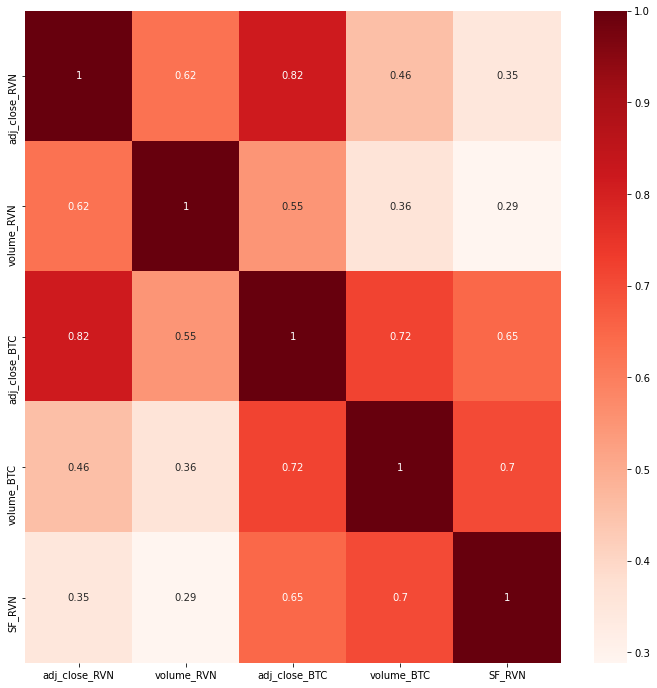

In [11]:
#heatmap

plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot=True, cmap='Reds')

## Correlation Results:

1. Ravencoin price has a strong correlation with Bitcoin price.

2. The second biggest correlation is with the volume of RVN operations followed by the volume of BTC. 

3. It presents a weak correlation with the SF variable (stock/flow), which invalidates the application of the S2F model to Ravencoin.

## Analyze:

1. It should be noted that the period object of this study (10/03/2018 to 31/05/2021) precedes the first halving, scheduled to run in January 2022. Source: https://ravencoin.org/halving/

Since the phenomenon called halving is not present in the data, it is important to repeat this analysis in future works.

2. We observe that the Bitcoin price has a strong correlation with the Ravencoin price, this phenomenon is repeated in several altcoins.
Source: https://www.analyticsvidhya.com/blog/2021/05/analyzing-the-cryptocurrency-of-may-2021-python-for-finance-basics/

Due to this high correlation with the BTC, it is possible that, even after the first Ravencoin halving, the S2F model does not obtain good results.

3. An important correlation between the price of the RVN and its volume indicates that the price is determined by supply and demand. That is, the price rises as demand increases.

It is worth remembering that there are a limited number of Ravencoins in circulation and new RVNs are created at a predictable and decreasing rate, denoting a long-term deflationary trend.

However, in the short term and based on the data available at the time of this analysis, we observe that the BTC price is more relevant in determining the RVN price than the RVN volume itself.


4. The RVN price has a stronger correlation with the BTC volume than with the S2F (stock/flow) variable, indicating that the Stock-to-Flow model is not efficient to forecast RVN prices in the short term.

## RVN price forecast

Although it is not possible to predict the RVN price from SF, we can create a model with the BTC price and RVN volume variables.

In [12]:
df = df.drop('volume_BTC', 1)
df = df.drop('SF_RVN', 1)
df = df.drop('date', 1)

df.head(10)

,adj_close_RVN,volume_RVN,adj_close_BTC
height_RVN,,,
7145000,0.02862,171820.00000,8866.00000
7380000,0.03188,279104.00000,9578.62988
7345000,0.03026,218114.00000,9205.12012
7675000,0.02790,167669.00000,9194.84961
7455000,0.02439,131838.00000,8269.80957
7170000,0.02447,114232.00000,8300.86035
7595000,0.02453,121884.00000,8338.34961
7325000,0.02277,108011.00000,7916.87988
7260000,0.02262,141594.00000,8223.67969


## Plotting the data

Seaborn’s jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.

"reg" plots a linear regression line.

In [13]:
sns.set_theme(color_codes=True)

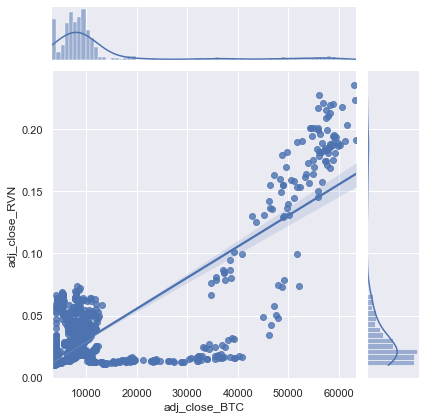

In [14]:
sns.jointplot(x='adj_close_BTC', y='adj_close_RVN', data=df, kind="reg")

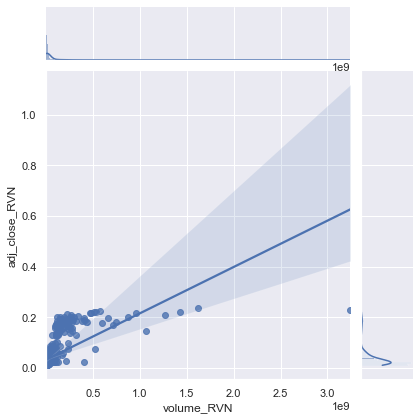

In [15]:
sns.jointplot(x='volume_RVN', y='adj_close_RVN', data=df, kind="reg")

## Checking for possible multicollinearity

Variable Inflation Factors

VIF starts at 1 and has no upper limit

VIF = 1, no correlation between the independent variable and the other variables

VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [16]:
# The function used to check the multicollinearity hypothesis is an adaptation of the code created by Aniruddha Bhandari
# Source: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [17]:
myVif = df.iloc[:,1:]
calc_vif(myVif)

,variables,VIF
0,volume_RVN,1.46578
1,adj_close_BTC,1.46578


VIF = 1.46578

No correlation between independent variables

# Defining training and testing dataframes

In [18]:
# x = independent variable -> volume_RVN, adj close_BTC
# y = dependent variable -> adj close_RVN

# here we have 2 variables for multiple regression
X = df[['adj_close_BTC', 'volume_RVN']]
y = df['adj_close_RVN']

X_training, X_test, y_training, y_test = train_test_split( X, y,
                                                          test_size = 0.2, random_state = 20210713)

print(f"Training dataframe: {X_training.shape[0]} lines")
print(f"Test dataframe....: {X_test.shape[0]} lines")

Training dataframe: 937 lines
Test dataframe....: 235 lines


In [19]:
X_training2 = np.asarray(X_training)
X_test2 = np.asarray(X_test)
y_training2 = np.asarray(y_training)
y_test2 = np.asarray(y_test)

# Building the models:

## 1. Multiple Linear Regression With scikit-learn

Useful for getting the advanced statistical parameters of a model

In [20]:
X_training = sm.add_constant(X_training)
X_testOriginal = X_test
X_test = sm.add_constant(X_test)

In [21]:
# Create a model and fit it
model_SM = sm.OLS(y_training, X_training).fit()
type(model_SM)

# SM = statsmodels

statsmodels.regression.linear_model.RegressionResultsWrapper

## Get results

R Square measures how much of variability in dependent variable can be explained by the model. 

In [22]:
print('Coefficient of Determination (𝑅²):', model_SM.rsquared)

Coefficient of Determination (𝑅²): 0.7098860817223511


Adjusted R Square prevent overfitting issue

In [23]:
print('Adjusted Coefficient of Determination (adjusted 𝑅²):', model_SM.rsquared_adj)

Adjusted Coefficient of Determination (adjusted 𝑅²): 0.7092648527752898


In [24]:
print('Regression Coefficients(intercept, 𝑏₀, 𝑏₁):\n', model_SM.params)

Regression Coefficients(intercept, 𝑏₀, 𝑏₁):
 const           0.00842
adj_close_BTC   0.00000
volume_RVN      0.00000
dtype: float64


In [25]:
print('P-values:\n', model_SM.pvalues)

P-values:
 const           0.00000
adj_close_BTC   0.00000
volume_RVN      0.00000
dtype: float64


In [26]:
model_SM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          adj_close_RVN   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1143.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):          1.05e-251
Time:                        14:56:39   Log-Likelihood:                 2184.2
No. Observations:                 937   AIC:                            -4362.
Df Residuals:                     934   BIC:                            -4348.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0084      0.001      7.701      0.000       0.006       0.011
adj_close_BTC  2.094e-06    6.5e-08     32.223      0.000    1.97e-06    2.22e-06
volume_RVN     7.044e-11   5.74e-12     12.268      0.000    5.92e-11    8.17e-11
==============================================================================
Omnibus:                      105.535   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.541
Skew:                          -0.609   Prob(JB):                     4.87e-59
Kurtosis:                       5.323   Cond. No.                     2.34e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

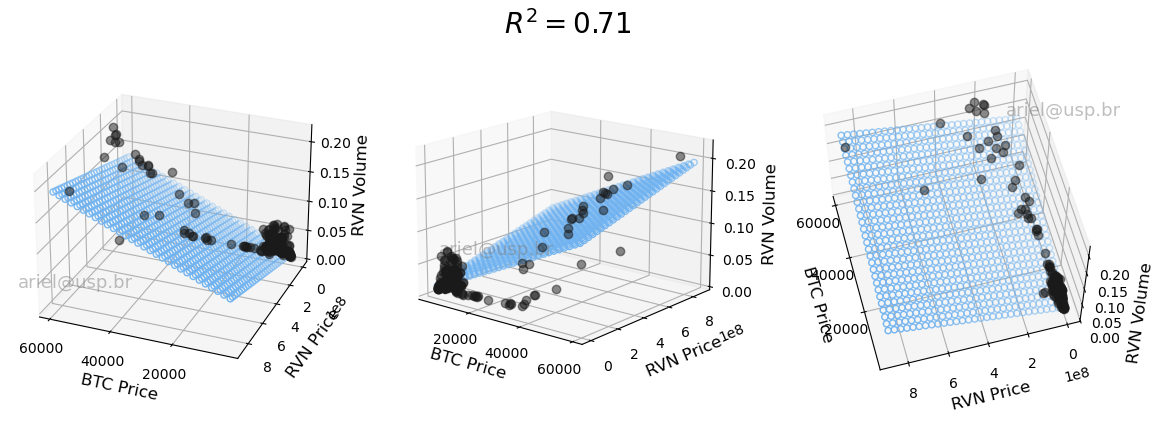

In [27]:
# The code used to generate the 3d graph is an adaptation of the code provided in Pythonic Excursions
# Source: https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

# Data preparation
email = 'ariel@usp.br'

X_FIG = X_testOriginal.values.reshape(-1,2)
Y_FIG = y_test

model = model_SM
r2 = model_SM.rsquared

# Prepare model data point for visualization
x_COORD = X_FIG[:, 0]
y_COORD = X_FIG[:, 1]
z_COORD = Y_FIG

x_RANGE = np.linspace(x_COORD.min(), x_COORD.max(), 30)  # range of x values
y_RANGE = np.linspace(y_COORD.min(), y_COORD.max(), 30)  # range of y values

xx_RANGE, yy_RANGE = np.meshgrid(x_RANGE, y_RANGE)

model_viz = np.array([xx_RANGE.flatten(), yy_RANGE.flatten()]).T

#Predict
model_viz = sm.add_constant(model_viz)
predicted = model.predict(model_viz)

# Plot

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x_COORD, y_COORD, z_COORD, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_RANGE.flatten(), yy_RANGE.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('BTC Price', fontsize=12)
    ax.set_ylabel('RVN Price', fontsize=12)
    ax.set_zlabel('RVN Volume', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
ax1.text2D(0.2, 0.32, email, fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, email, fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, email, fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()    


## Exporting PNG to generate GIF manually using the website https://ezgif.com/maker

In [28]:
for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('PNG/linear%d.png' % ii)

In [29]:
Image(url='GIF/linear.gif')

 ## Evaluate

In [30]:
y_pred_SM = model_SM.predict(X_test)
print('predicted response:', y_pred_SM, sep='\n')

predicted response:
height_RVN
7070000   0.02768
7065000   0.08659
7180000   0.02139
7180000   0.02226
7165000   0.03163
            ...  
7115000   0.03340
7185000   0.03317
7170000   0.03199
7060000   0.03075
7200000   0.02235
Length: 235, dtype: float64


Text(0, 0.5, 'Predictions')

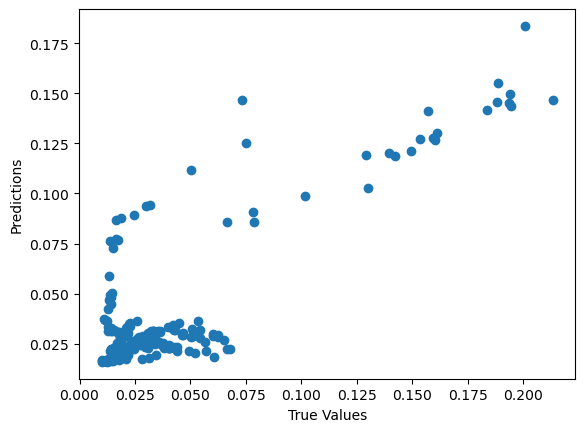

In [31]:
## The line / model
plt.scatter(y_test, y_pred_SM)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Mean Square Error is an absolute measure of the goodness for the fit.

In [32]:
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_test, y_pred_SM))

Mean Absolute Error(MAE):  0.01488225771514125


MSE gives an absolute number on how much your predicted results deviate from the actual number.

In [33]:
print('Mean Square Error(MSE): ', metrics.mean_squared_error(y_test, y_pred_SM))

Mean Square Error(MSE):  0.0004892179886644842


In [34]:
print('Root Mean Square Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_SM)))

Root Mean Square Error(RMSE):  0.022118272732392197


## 2. Polynomial Regression With scikit-learn

In [35]:
# Data Preparation
# Include 𝑥²
poly = PolynomialFeatures(degree=2, include_bias=False)
X_training2_ = poly.fit_transform(X_training2)
X_test2_ = poly.fit_transform(X_test2)

In [36]:
# Define and train a model
model_POLY = LinearRegression().fit(X_training2_, y_training2)
type(model_POLY)

sklearn.linear_model._base.LinearRegression

## Get results

In [37]:
print('Coefficient of Determination (𝑅²):', model_POLY.score(X_training2_, y_training2))

Coefficient of Determination (𝑅²): 0.8538252108360737


In [38]:
# Calculate bias and variance
y_pred_POLY = model_POLY.predict(X_training2_)

In [39]:
# Another way to get R2
r2_POLY = r2_score(y_training2, y_pred_POLY)
print('Coefficient of Determination (𝑅²):', r2_POLY)

Coefficient of Determination (𝑅²): 0.8538252108360737


In [40]:
adj_r2_POLY = 1-(1-r2_POLY) * (len(y_training2) - 1) / (len(y_training2) - X_training2_.shape[1] - 1)
print('Adjusted Coefficient of Determination (adjusted 𝑅²):', adj_r2_POLY)

Adjusted Coefficient of Determination (adjusted 𝑅²): 0.8530401690038292


In [41]:
print('Regression Intercept:\n', model_POLY.intercept_)

Regression Intercept:
 0.04340521870129358


In [42]:
print('Regression Coefficients(𝑏₀, 𝑏₁):\n', model_POLY.coef_)

Regression Coefficients(𝑏₀, 𝑏₁):
 [-3.33708577e-06  3.63532449e-10  9.34454615e-11 -4.97977385e-15
 -1.95521927e-20]


In [43]:
X_training2_

array([[7.88925000e+03, 3.31989000e+05, 6.22402656e+07, 2.61914422e+09,
        1.10216696e+11],
       [8.59574023e+03, 2.23910950e+07, 7.38867502e+07, 1.92468036e+11,
        5.01361135e+14],
       [9.91184180e+03, 1.70214930e+07, 9.82446078e+07, 1.68714346e+11,
        2.89731224e+14],
       ...,
       [4.51377695e+04, 3.20505097e+08, 2.03741824e+09, 1.44668852e+13,
        1.02723517e+17],
       [1.30162314e+04, 5.57152890e+07, 1.69422281e+08, 7.25203097e+11,
        3.10419343e+15],
       [8.16655420e+03, 6.14181200e+06, 6.66926075e+07, 5.01574406e+10,
        3.77218546e+13]])

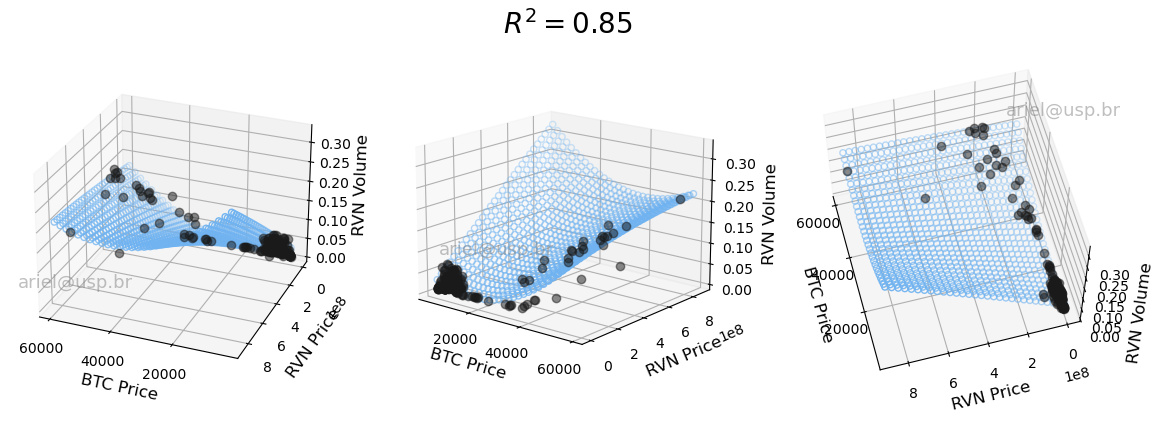

In [44]:
# The code used to generate the 3d graph is an adaptation of the code provided in Pythonic Excursions
# Source: https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

# Data preparation
email = 'ariel@usp.br'

X_FIG = X_testOriginal.values.reshape(-1,2)
Y_FIG = y_test

model = model_POLY
r2 = r2_POLY

# Prepare model data point for visualization
x_COORD = X_FIG[:, 0]
y_COORD = X_FIG[:, 1]
z_COORD = Y_FIG

x_RANGE = np.linspace(x_COORD.min(), x_COORD.max(), 30)  # range of x values
y_RANGE = np.linspace(y_COORD.min(), y_COORD.max(), 30)  # range of y values

xx_RANGE, yy_RANGE = np.meshgrid(x_RANGE, y_RANGE)

model_viz = np.array([xx_RANGE.flatten(), yy_RANGE.flatten()]).T

#Predict
model_viz = poly.fit_transform(model_viz)
predicted = model.predict(model_viz)

# Plot

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x_COORD, y_COORD, z_COORD, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_RANGE.flatten(), yy_RANGE.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('BTC Price', fontsize=12)
    ax.set_ylabel('RVN Price', fontsize=12)
    ax.set_zlabel('RVN Volume', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
ax1.text2D(0.2, 0.32, email, fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, email, fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, email, fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()    


## Exporting PNG to generate GIF manually using the website https://ezgif.com/maker

In [45]:
for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('PNG/poly%d.png' % ii)

In [46]:
Image(url='GIF/poly.gif')

 ## Evaluate

In [47]:
y_pred_POLY = model_POLY.predict(X_test2_)
print('predicted response:', y_pred_POLY, sep='\n')

predicted response:
[0.02593219 0.04989682 0.03072549 0.02566433 0.02061702 0.02859036
 0.02820605 0.02569454 0.12606258 0.01596896 0.02468973 0.02385567
 0.02381541 0.0247157  0.02577003 0.02519552 0.02470226 0.16052244
 0.18228374 0.0266356  0.03297307 0.02583483 0.02242317 0.03441254
 0.02612963 0.03156033 0.05261504 0.02395338 0.02613168 0.02229392
 0.02609761 0.0279123  0.01837953 0.03607831 0.03224137 0.03365607
 0.03240492 0.02103964 0.02675562 0.02644225 0.03402844 0.022944
 0.02916831 0.03020356 0.04768952 0.02068638 0.02483165 0.02332719
 0.05557363 0.02505205 0.02309836 0.0261766  0.02876328 0.03272287
 0.02013516 0.02881199 0.07506079 0.02430705 0.03694287 0.01525676
 0.13768454 0.03353884 0.04309475 0.02377019 0.121027   0.02652336
 0.02412752 0.12007265 0.03047279 0.02005948 0.18361903 0.02697017
 0.02139918 0.02214614 0.01503443 0.02060607 0.02160654 0.02278471
 0.02847116 0.0277912  0.02220452 0.13403495 0.03303253 0.03377948
 0.02283978 0.03607494 0.02544314 0.02361687

Text(0, 0.5, 'Predictions')

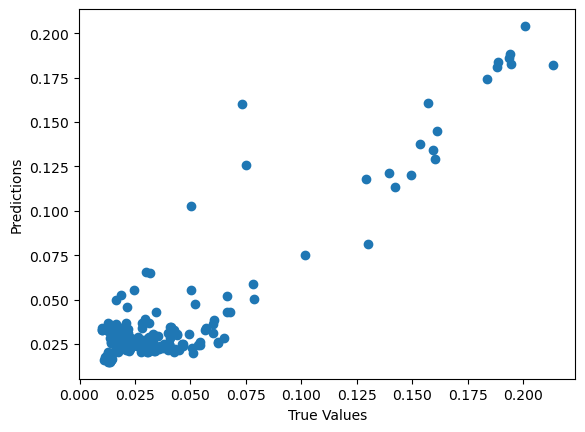

In [48]:
## The line / model
plt.scatter(y_test2, y_pred_POLY)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [49]:
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_test2, y_pred_POLY))

Mean Absolute Error(MAE):  0.01264981664892703


In [50]:
print('MSE: ', metrics.mean_squared_error(y_test2, y_pred_POLY))

MSE:  0.0002821002166365771


In [51]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_POLY)))

RMSE:  0.01679583926562103


## About the results

In [52]:
dfResults = pd.DataFrame()
dfResults['adj_close_RVN'] = y_test
dfResults['prediction'] = y_pred_POLY
dfResults['error'] = dfResults['adj_close_RVN'] - dfResults['prediction']
dfResults.sort_index(inplace=True)
dfResults.reset_index(inplace=True)
dfResults

,height_RVN,adj_close_RVN,prediction,error
0,1125000,0.01832,0.02537,-0.00705
1,1265000,0.01734,0.02610,-0.00875
2,1330000,0.01761,0.02519,-0.00759
3,1380000,0.02041,0.02614,-0.00572
4,1395000,0.02066,0.02611,-0.00545
...,...,...,...,...
230,7715000,0.02376,0.02564,-0.00188
231,8470000,0.05112,0.02014,0.03098
232,9500000,0.02191,0.03135,-0.00944
233,10740000,0.01696,0.02289,-0.00593


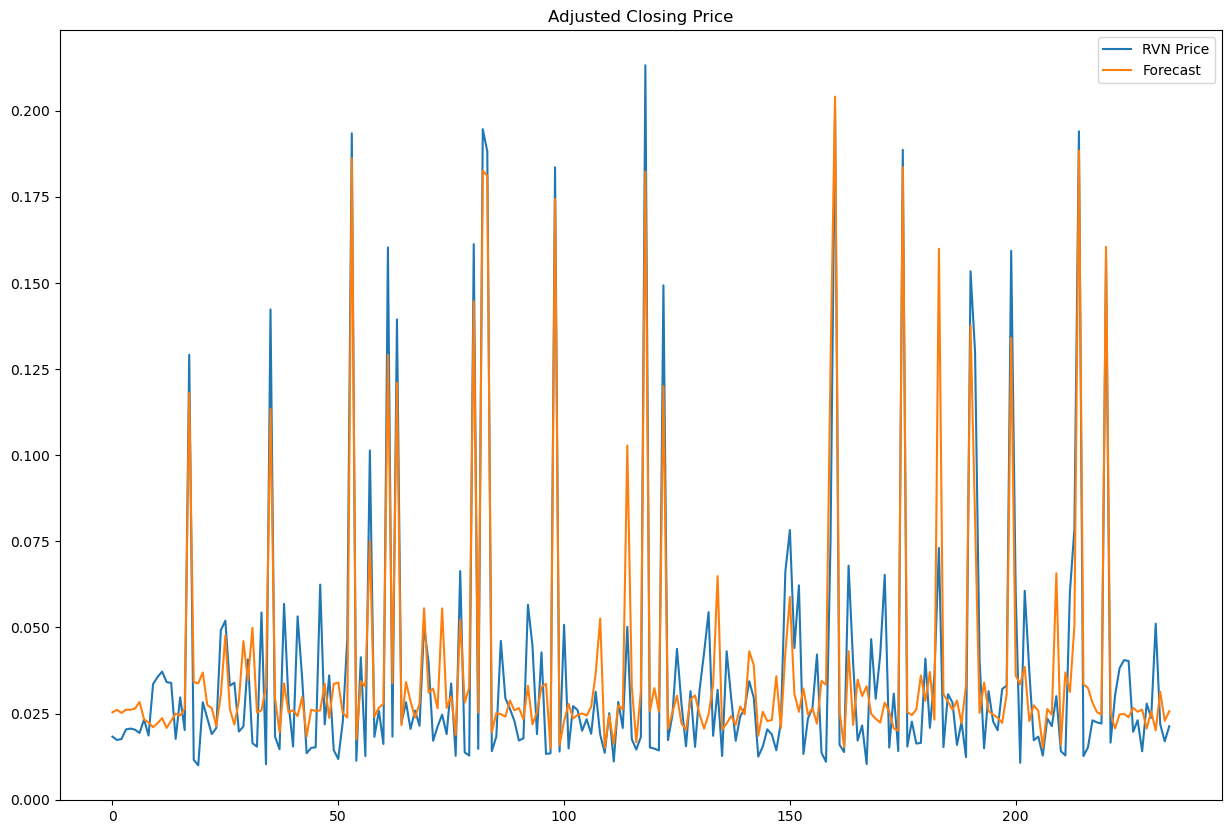

In [53]:
dfResults['adj_close_RVN'].plot(label='RVN Price', figsize=(15,10), title='Adjusted Closing Price')
dfResults['prediction'].plot(label='Forecast')
plt.legend()

In [54]:
dfError = pd.DataFrame()

dfError['error'] = dfResults['error']

dfError.sort_index(inplace=True)

dfError

,error
0,-0.00705
1,-0.00875
2,-0.00759
3,-0.00572
4,-0.00545
...,...
230,-0.00188
231,0.03098
232,-0.00944
233,-0.00593


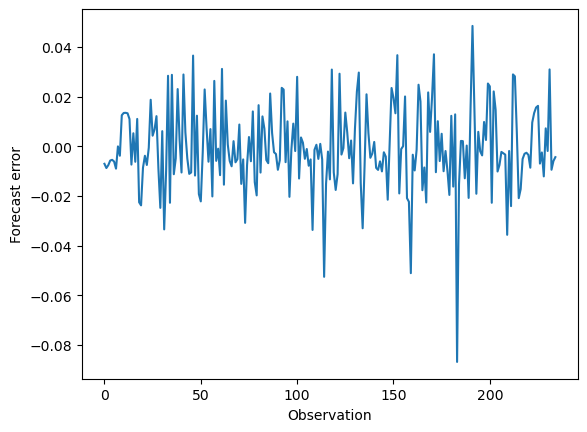

In [55]:
plt.plot(dfError)
plt.xlabel("Observation")
plt.ylabel("Forecast error")
plt.show()

In [56]:
dfError['error_module'] = dfError['error'].abs()
dfError

,error,error_module
0,-0.00705,0.00705
1,-0.00875,0.00875
2,-0.00759,0.00759
3,-0.00572,0.00572
4,-0.00545,0.00545
...,...,...
230,-0.00188,0.00188
231,0.03098,0.03098
232,-0.00944,0.00944
233,-0.00593,0.00593


In [57]:
print('Highest error value: ', dfError['error'].max())

Highest error value:  0.048508072671860414


In [58]:
print('Lowest error value: ', dfError['error'].min())

Lowest error value:  -0.08687013119396347


In [59]:
print('Average error: ', dfError['error_module'].mean())

Average error:  0.012649816648927033


In [60]:
print('RVNs latest closing quote price available in the dataset: ', df['adj_close_RVN'].iloc[-1])

RVNs latest closing quote price available in the dataset:  0.084311


## Understanding the error

In [61]:
dfErrorAnalysis = dfError['error'].value_counts(bins = 7, sort=False)

dfErrorAnalysis = dfErrorAnalysis.reset_index()
dfErrorAnalysis.rename(columns={'index':'Class_Interval'}, inplace=True)

dfErrorAnalysis.rename(columns={'error':'Frequency'}, inplace=True)

dfErrorAnalysis['Relative_Frequency'] = dfErrorAnalysis['Frequency']/dfErrorAnalysis['Frequency'].sum()

dfErrorAnalysis

,Class_Interval,Frequency,Relative_Frequency
0,"(-0.088, -0.0675]",1,0.00426
1,"(-0.0675, -0.0482]",2,0.00851
2,"(-0.0482, -0.0289]",5,0.02128
3,"(-0.0289, -0.00951]",51,0.21702
4,"(-0.00951, 0.00983]",118,0.50213
5,"(0.00983, 0.0292]",49,0.20851
6,"(0.0292, 0.0485]",9,0.03830


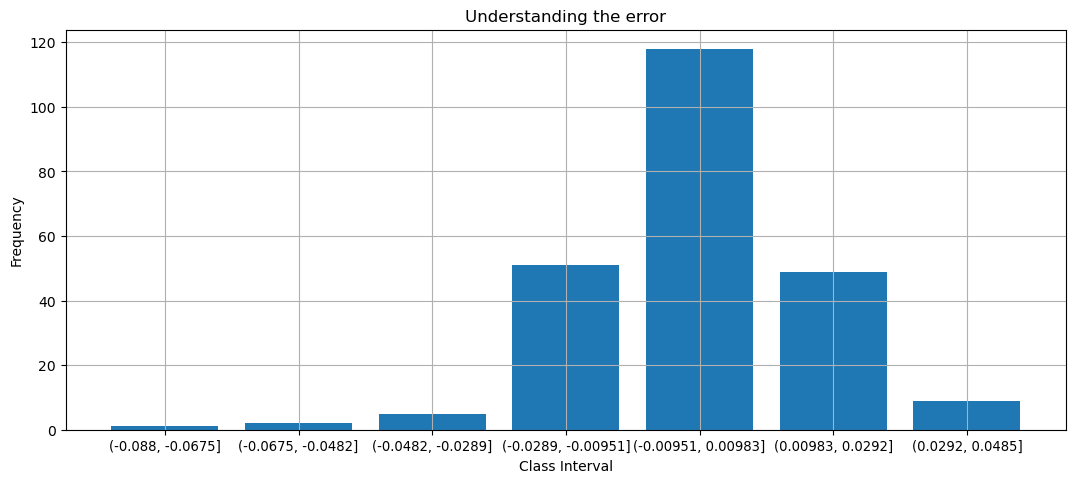

In [62]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0,0,1,1])
ax.bar(dfErrorAnalysis['Class_Interval'].astype(str), dfErrorAnalysis['Frequency'])
plt.xticks(size = 9.5)
plt.grid(True)
plt.title('Understanding the error')
plt.xlabel('Class Interval')
plt.ylabel('Frequency')
plt.show()

## Conclusion on the evaluation of results

The use of polynomial regression to predict Ravencoin price from Bitcoin Price and Ravencoin Volume fulfills the didactic objective of demonstrating the correct application of the techniques learned during the course.

However, it does not seem appropriate to use a model with an average forecast error of around 1 cent, considering that the last available quotation for this asset in the dataset corresponds to 8.4311 cents.
It is recommended for future work to study the inclusion of new variables in order to increase the predictive capacity of the model and/or test other predictive algorithms.